In [1]:
import keras
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


Using TensorFlow backend.
2113536/2110848 [==============================] - 2s 1us/step


In [2]:
len(train_data)


8982

In [3]:
len(test_data)


2246

In [4]:
train_data[10]


[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 1s 1us/step


In [6]:
decoded_newswire


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[10]


3

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [10]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 192us/step - loss: 2.5763 - accuracy: 0.5367 - val_loss: 1.6986 - val_accuracy: 0.6740
Epoch 2/20
7982/7982 [==============================] - 1s 141us/step - loss: 1.4004 - accuracy: 0.7132 - val_loss: 1.3117 - val_accuracy: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 139us/step - loss: 1.0556 - accuracy: 0.7767 - val_loss: 1.1530 - val_accuracy: 0.7390
Epoch 4/20
7982/7982 [==============================] - 1s 137us/step - loss: 0.8360 - accuracy: 0.8182 - val_loss: 1.0577 - val_accuracy: 0.7910
Epoch 5/20
7982/7982 [==============================] - 1s 142us/step - loss: 0.6645 - accuracy: 0.8607 - val_loss: 0.9714 - val_accuracy: 0.8050
Epoch 6/20
7982/7982 [==============================] - 1s 135us/step - loss: 0.5268 - accuracy: 0.8939 - val_loss: 0.9375 - val_accuracy: 0.8050
Epoch 7/20
7982/7982 [==============================] - 1s 142us/step - loss

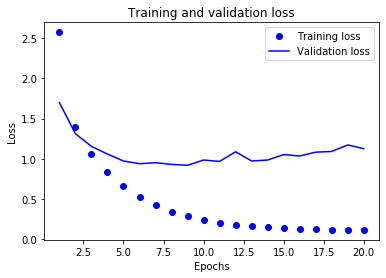

In [15]:

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

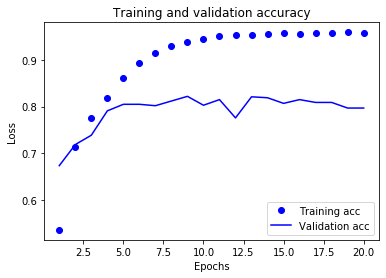

In [38]:

plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [39]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 184us/step - loss: 2.6774 - accuracy: 0.5043 - val_loss: 1.7575 - val_accuracy: 0.6420
Epoch 2/8
7982/7982 [==============================] - 1s 126us/step - loss: 1.4256 - accuracy: 0.7111 - val_loss: 1.2979 - val_accuracy: 0.7240
Epoch 3/8
7982/7982 [==============================] - 1s 133us/step - loss: 1.0425 - accuracy: 0.7856 - val_loss: 1.1286 - val_accuracy: 0.7610
Epoch 4/8
7982/7982 [==============================] - 1s 148us/step - loss: 0.8173 - accuracy: 0.8261 - val_loss: 1.0194 - val_accuracy: 0.7900
Epoch 5/8
7982/7982 [==============================] - 1s 154us/step - loss: 0.6471 - accuracy: 0.8672 - val_loss: 0.9815 - val_accuracy: 0.7880
Epoch 6/8
7982/7982 [==============================] - 1s 138us/step - loss: 0.5182 - accuracy: 0.8929 - val_loss: 0.9393 - val_accuracy: 0.8080
Epoch 7/8
7982/7982 [==============================] - 1s 151us/step - loss: 0.421

In [40]:
results

[1.0024027232070747, 0.7813891172409058]

In [41]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18967052537845058

In [42]:
predictions = model.predict(x_test)


In [43]:
predictions[0].shape


(46,)

In [44]:
np.sum(predictions[0])


1.0

In [45]:
np.argmax(predictions[0])


3

In [46]:

y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [47]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])


In [48]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 310us/step - loss: 2.3880 - accuracy: 0.5525 - val_loss: 1.6892 - val_accuracy: 0.6020
Epoch 2/20
7982/7982 [==============================] - 2s 240us/step - loss: 1.4943 - accuracy: 0.6450 - val_loss: 1.4401 - val_accuracy: 0.6500
Epoch 3/20
7982/7982 [==============================] - 2s 248us/step - loss: 1.2532 - accuracy: 0.6775 - val_loss: 1.3356 - val_accuracy: 0.6710
Epoch 4/20
7982/7982 [==============================] - 2s 267us/step - loss: 1.1049 - accuracy: 0.7265 - val_loss: 1.2973 - val_accuracy: 0.6870
Epoch 5/20
7982/7982 [==============================] - 2s 245us/step - loss: 0.9945 - accuracy: 0.7538 - val_loss: 1.2626 - val_accuracy: 0.7060
Epoch 6/20
7982/7982 [==============================] - 2s 253us/step - loss: 0.9074 - accuracy: 0.7656 - val_loss: 1.2561 - val_accuracy: 0.7020
Epoch 7/20
7982/7982 [==============================] - 2s 224us/step - loss

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [51]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 2s 216us/step - loss: 2.2946 - accuracy: 0.5517 - val_loss: 1.4312 - val_accuracy: 0.6740
Epoch 2/8
7982/7982 [==============================] - 1s 181us/step - loss: 1.1165 - accuracy: 0.7607 - val_loss: 1.1028 - val_accuracy: 0.7550
Epoch 3/8
7982/7982 [==============================] - 1s 172us/step - loss: 0.7814 - accuracy: 0.8334 - val_loss: 0.9496 - val_accuracy: 0.7990
Epoch 4/8
7982/7982 [==============================] - 1s 168us/step - loss: 0.5473 - accuracy: 0.8909 - val_loss: 0.8820 - val_accuracy: 0.8170
Epoch 5/8
7982/7982 [==============================] - 1s 165us/step - loss: 0.4212 - accuracy: 0.9126 - val_loss: 0.8660 - val_accuracy: 0.8090
Epoch 6/8
7982/7982 [==============================] - 1s 172us/step - loss: 0.3111 - accuracy: 0.9336 - val_loss: 0.8462 - val_accuracy: 0.8200
Epoch 7/8
7982/7982 [==============================] - 1s 167us/step - loss: 0.246

In [52]:
results

[0.9713884722623884, 0.7943009734153748]

In [53]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 141us/step - loss: 2.9056 - accuracy: 0.4143 - val_loss: 2.2183 - val_accuracy: 0.5640
Epoch 2/8
7982/7982 [==============================] - 1s 103us/step - loss: 1.8293 - accuracy: 0.6402 - val_loss: 1.6472 - val_accuracy: 0.6530
Epoch 3/8
7982/7982 [==============================] - 1s 101us/step - loss: 1.4012 - accuracy: 0.7037 - val_loss: 1.4099 - val_accuracy: 0.6940
Epoch 4/8
7982/7982 [==============================] - 1s 104us/step - loss: 1.1645 - accuracy: 0.7409 - val_loss: 1.2551 - val_accuracy: 0.7210
Epoch 5/8
7982/7982 [==============================] - 1s 103us/step - loss: 0.9937 - accuracy: 0.7783 - val_loss: 1.1551 - val_accuracy: 0.7460
Epoch 6/8
7982/7982 [==============================] - 1s 110us/step - loss: 0.8560 - accuracy: 0.8126 - val_loss: 1.0841 - val_accuracy: 0.7780
Epoch 7/8
7982/7982 [==============================] - 1s 115us/step - loss: 0.738

In [54]:
results

[1.080119699850108, 0.7617987394332886]